# Check calibration

## Lightnovo ApS

### info@lightnovo.com

Copyright 2024 Lightnovo ApS

Licensing: MIT license

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import pybaselines

In [2]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
#Raman spectrum class
class raman_spectrum:
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        self.df = pd.read_csv(fname + '.tsv', sep='\t', header =7)
        self.df.rename(columns={'Tags':'Raman Shift, cm-1', self.df.columns[1]:'Intensity, %'}, inplace = True)
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df.dropna(inplace = True)
        self.baseline()
        self.normalize()
   
  
    def baseline(self):
        pass
        self.df["Baseline, %"] = pybaselines.whittaker.arpls(self.df["Intensity, %"])[0]
        self.df["Baseline Corrected, %"] = self.df["Intensity, %"] - self.df["Baseline, %"] 
        
    def normalize(self):
        self.df["Normalized Intensity"] = (self.df["Intensity, %"] - ( min0:=self.df["Intensity, %"].min()) )/(self.df["Intensity, %"].max() - min0) 
        self.df["Normalized Baseline Corrected"] = (self.df["Baseline Corrected, %"] - ( min0:=self.df["Baseline Corrected, %"].min()) )/(self.df["Baseline Corrected, %"].max() - min0) 
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
  
    def plot_baseline(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Baseline, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_baseline_corrected(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Baseline Corrected, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_baseline_corrected_n(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Baseline Corrected", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_n(self, color, label, marker = None):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Intensity", marker = marker, color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 

In [4]:
from scipy.special import wofz
from scipy.optimize import curve_fit

def voigt(x, A0, A, x0, sigma, gamma):
    return A0 + A * np.real(wofz((x - x0 + 1j*gamma)/sigma/np.sqrt(2))) / sigma /np.sqrt(2*np.pi)

def voigt_fit(x, y, p0):
    popt, pcov = curve_fit(voigt, x, y, p0=p0)
    return popt

In [5]:
#load data

f_Si = "Data/silicon"
f_polystyrene = "Data/polystyrene"
f_paracetamol = "Data/paracetamol"
f_calcite = "Data/calcite"

In [6]:
s_Si = raman_spectrum(f_Si)
s_polystyrene = raman_spectrum(f_polystyrene)
s_paracetamol = raman_spectrum(f_paracetamol)
s_calcite = raman_spectrum(f_calcite)

## Silicon

In [7]:
s = s_Si

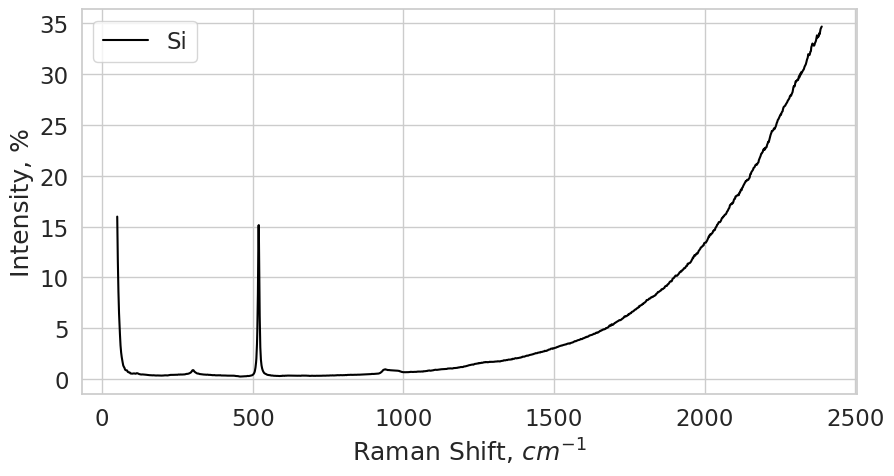

In [8]:
plt.figure(figsize = (10,5))
s.plot("black","Si")

[-1.82400567e-03  3.85980008e+00  5.19487463e+02  6.08961833e-05
  2.75851249e+00]

line position:  519.487462570309
deviation:  -0.9625374296909968


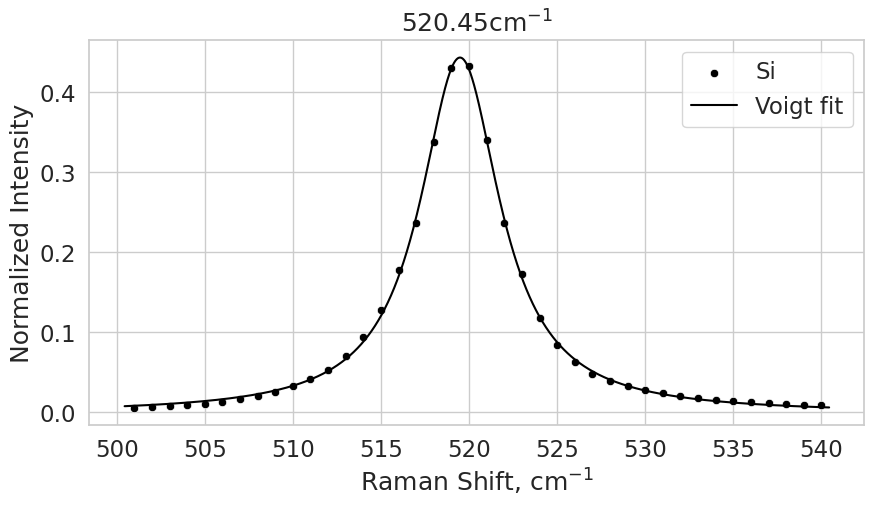

In [9]:
x0 = 520.45
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'black', label = 'Si')
plt.plot(xx,yy, color = 'black', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

## Polystyrene

In [10]:
s = s_polystyrene

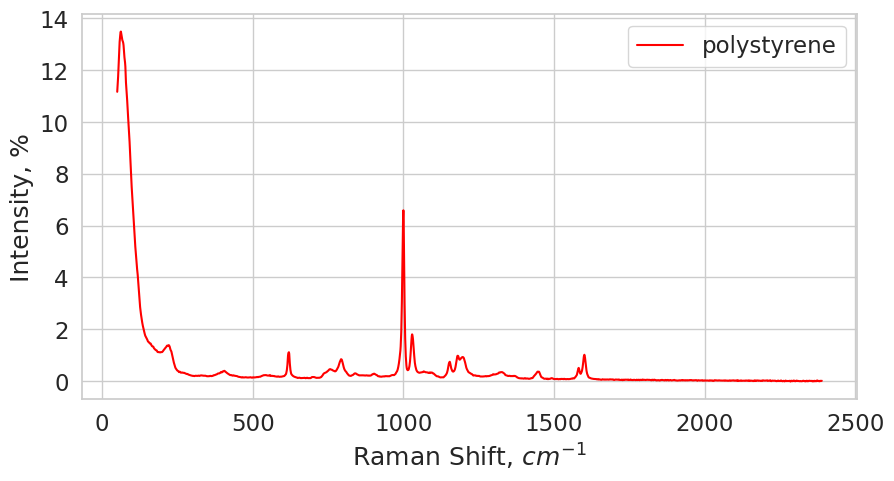

In [11]:
plt.figure(figsize = (10,5))
s.plot("red","polystyrene")

[1.27576047e-02 8.13471565e-01 6.19183013e+02 2.16261526e+00
 2.46173622e+00]

line position:  619.1830127329499
deviation:  -1.716987267050058


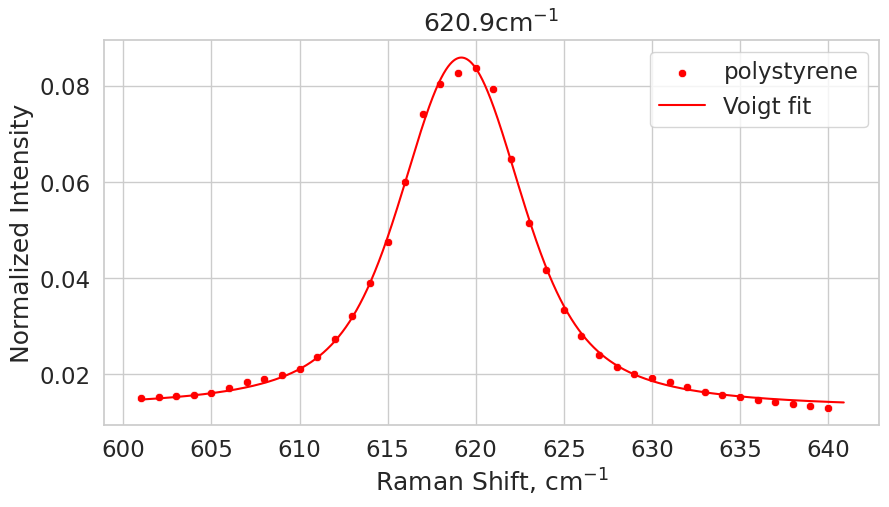

In [12]:
x0 = 620.9
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'red', label = 'polystyrene')
plt.plot(xx,yy, color = 'red', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[2.65040635e-02 4.97712115e+00 9.99484862e+02 2.23357847e+00
 2.30146332e+00]

line position:  999.4848618628433
deviation:  -1.9151381371566458


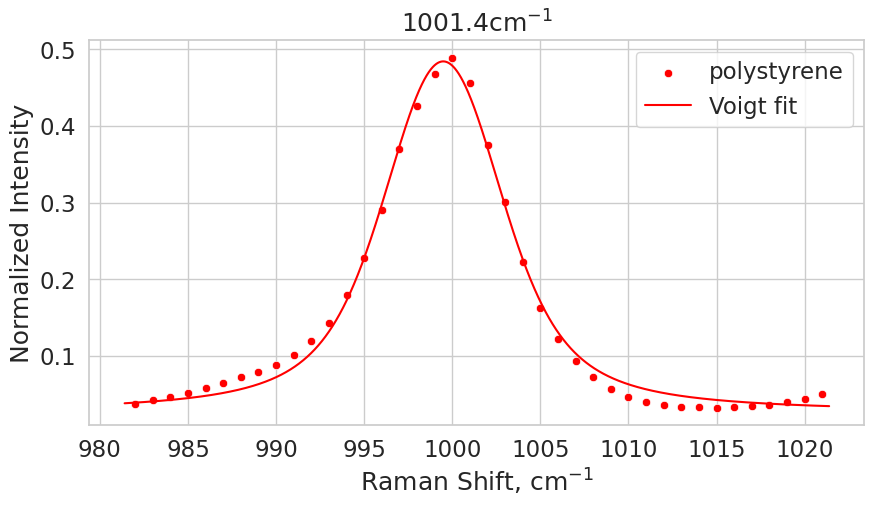

In [13]:
x0 = 1001.4
dx =  20
p0 = [0.1, 1, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'red', label = 'polystyrene')
plt.plot(xx,yy, color = 'red', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[2.57417301e-02 1.55952821e+00 1.02959058e+03 3.56531609e+00
 2.45493380e+00]

line position:  1029.5905801533254
deviation:  -2.209419846674564


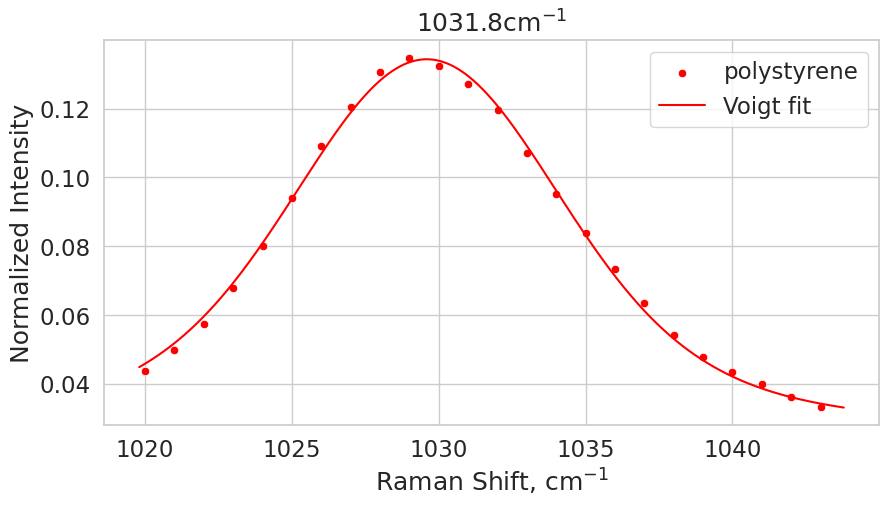

In [14]:
x0 = 1031.8
dx =  12
p0 = [0, 0.3, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'red', label = 'polystyrene')
plt.plot(xx,yy, color = 'red', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[1.94141850e-03 1.40506888e+00 1.60068069e+03 2.14353380e-01
 5.98211366e+00]

line position:  1600.6806875241205
deviation:  -1.6193124758794966


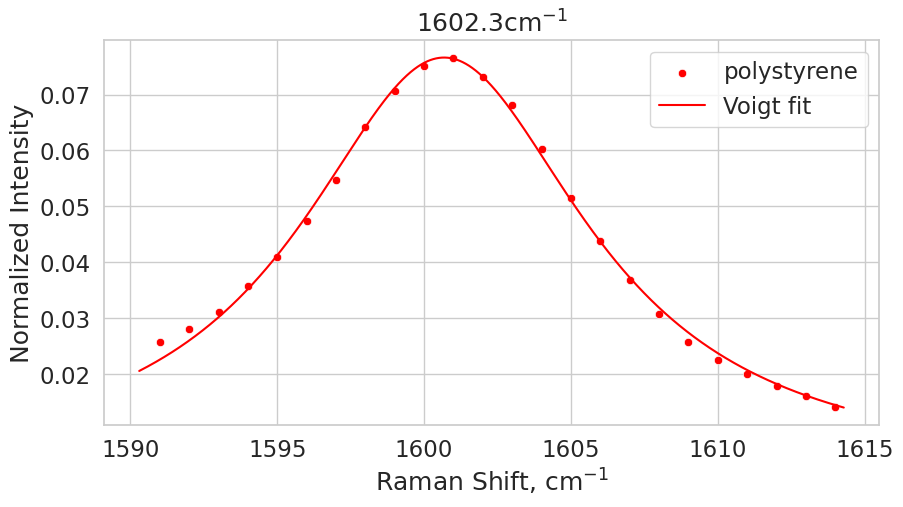

In [15]:
x0 = 1602.3
dx =  12
p0 = [0, 0.3, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'red', label = 'polystyrene')
plt.plot(xx,yy, color = 'red', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

## Paracetamol

In [16]:
s = s_paracetamol

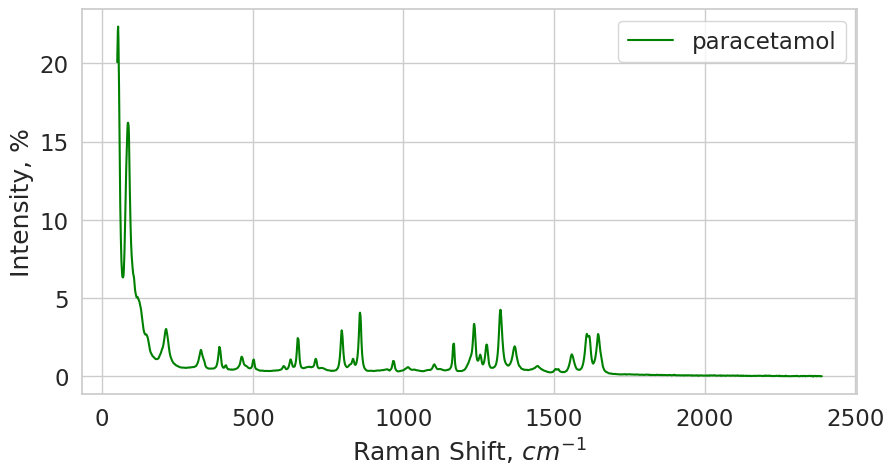

In [17]:
plt.figure(figsize = (10,5))
s.plot("green","paracetamol")

[2.14878427e-02 1.37707374e+00 7.95664851e+02 2.87129052e+00
 2.40452241e+00]

line position:  795.6648512248634
deviation:  -1.5351487751366903


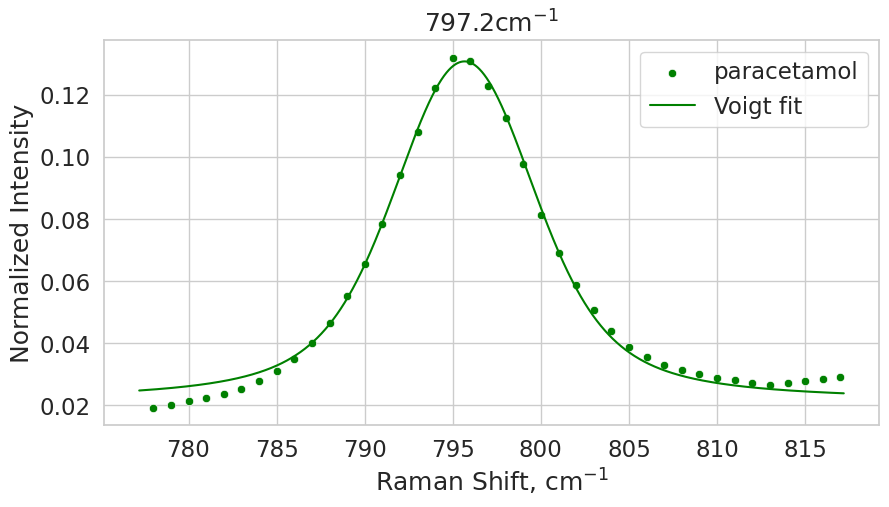

In [18]:
x0 = 797.2
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[1.53175521e-02 2.42490044e+00 8.56089757e+02 1.75966569e+00
 3.95179240e+00]

line position:  856.0897572019384
deviation:  -1.8102427980616085


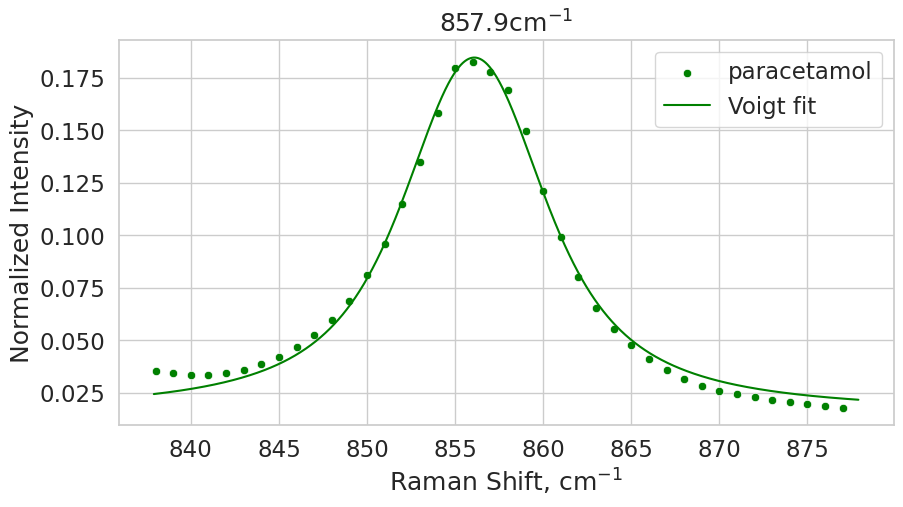

In [19]:
x0 = 857.9
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[1.53931198e-02 8.12918260e-01 1.16660021e+03 2.04947395e+00
 2.08674206e+00]

line position:  1166.600211655473
deviation:  -1.8997883445269963


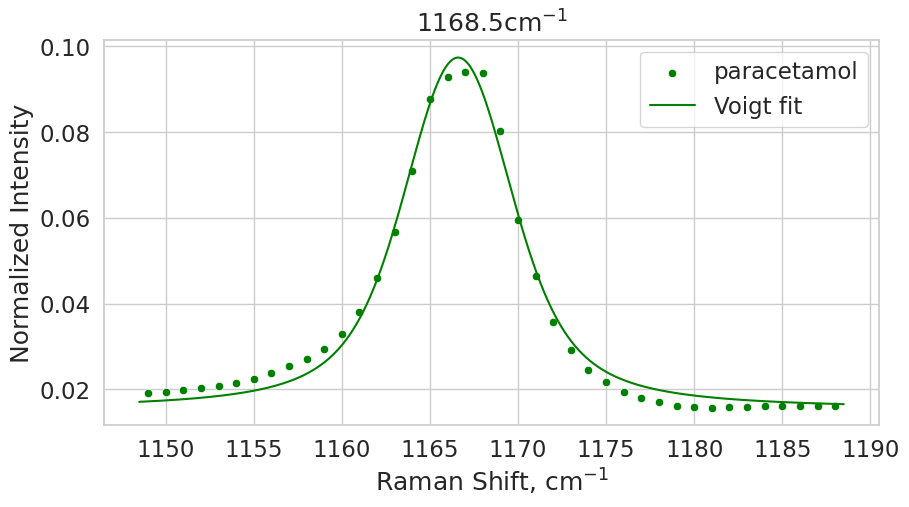

In [20]:
x0 = 1168.5
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[ 5.37416468e-02  7.93142119e-01  1.23488390e+03  4.34694381e+00
 -1.34820608e+00]

line position:  1234.8838983276687
deviation:  -1.9161016723312514


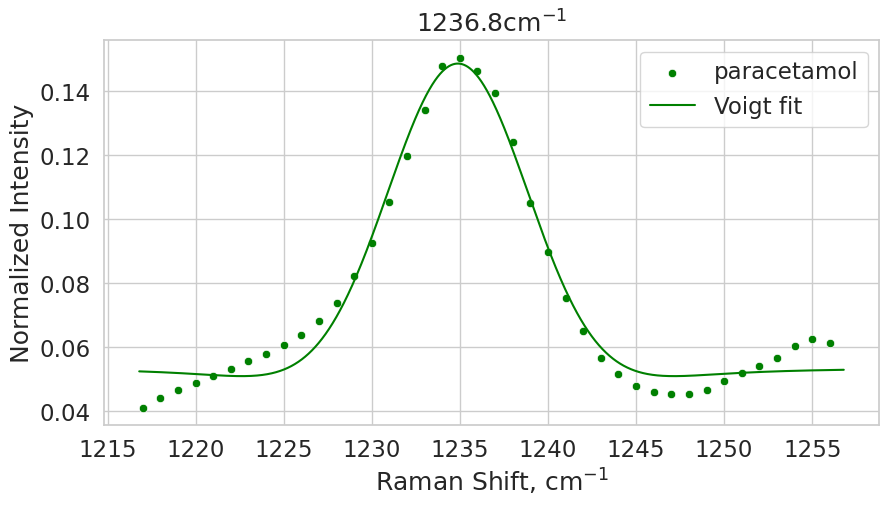

In [21]:
x0 = 1236.8
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[2.06202066e-02 3.04252298e+00 1.32253497e+03 2.92444115e+00
 4.41434176e+00]

line position:  1322.5349748545116
deviation:  -1.3650251454885165


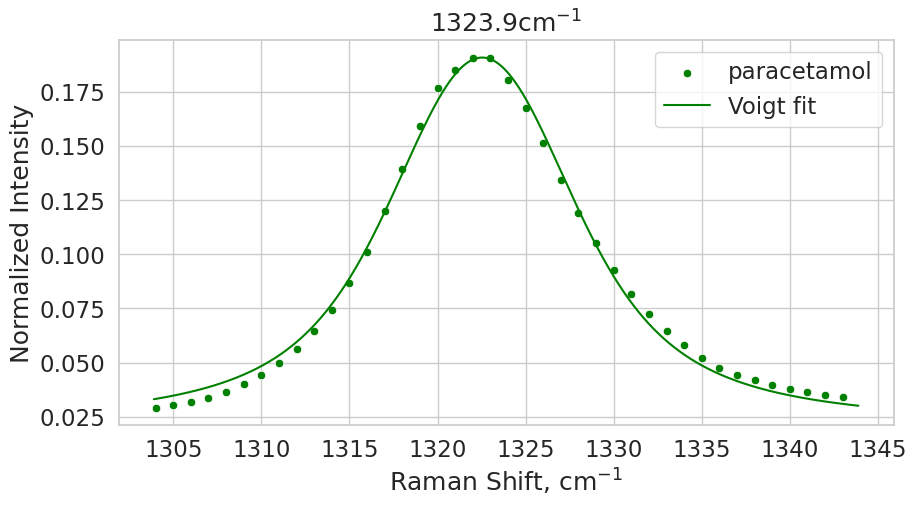

In [22]:
x0 = 1323.9
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

[1.91603946e-02 2.26964177e+00 1.64703440e+03 6.16183163e-04
 7.13617813e+00]

line position:  1647.0344001560795
deviation:  -1.3655998439205632


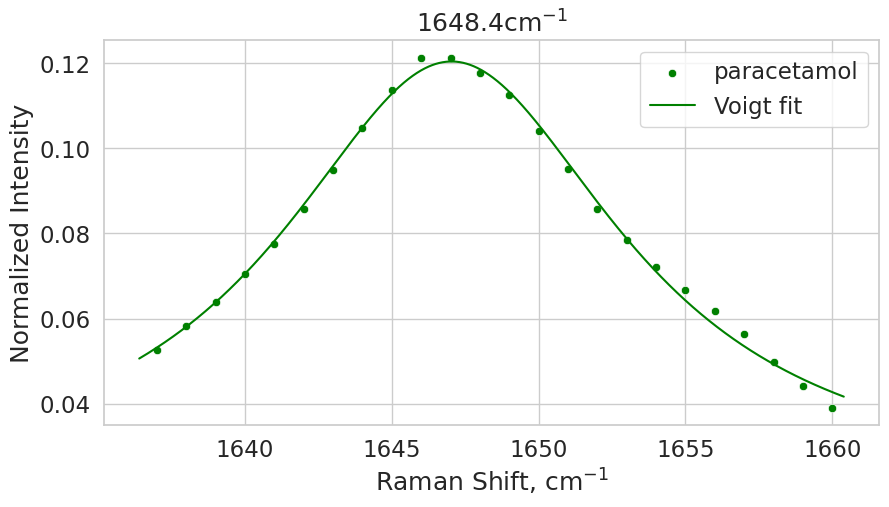

In [23]:
x0 = 1648.4
dx =  12
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'green', label = 'paracetamol')
plt.plot(xx,yy, color = 'green', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")

print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)

## Calcite

In [24]:
s = s_calcite

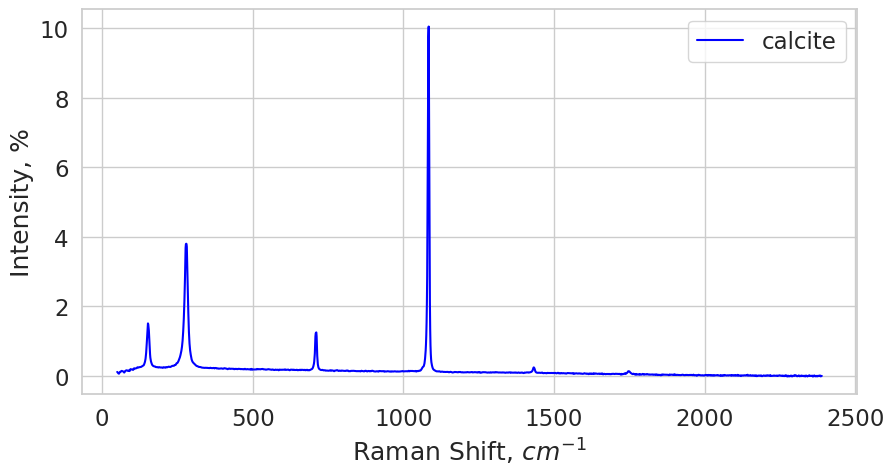

In [25]:
plt.figure(figsize = (10,5))
s.plot("blue","calcite")

[1.01618454e-02 7.77280336e+00 1.08343337e+03 1.74095436e+00
 1.55602633e+00]

line position:  1083.4333683509412
deviation:  -1.5666316490587633
FWHH:  6.011661950934873

resolution:  5.218593349921514


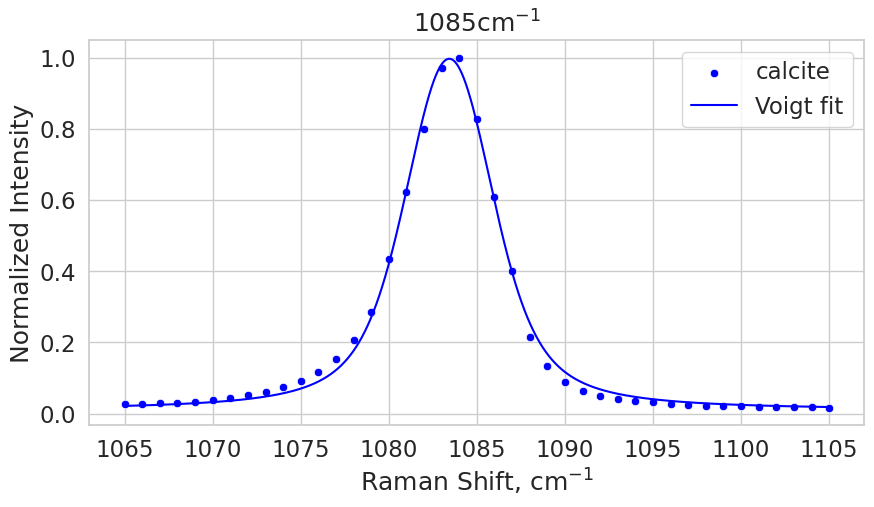

In [26]:
x0 = 1085
dx =  20
p0 = [0.1, 0.8, x0, 2,2]

xx = np.arange(x0-dx,x0+dx,0.01)
df = s.df[s.df["Raman Shift, cm-1"].between(x0-dx,x0+dx, inclusive = 'both')]

popt = voigt_fit(df["Raman Shift, cm-1"],df["Normalized Intensity"], p0)
yy = voigt(xx,*popt)


fG = 2*np.sqrt(2*np.log(2))*popt[3]
fL = 2*popt[4]
f_Voigt = 0.5346 * fL  + np.sqrt( 0.2166 * fL**2 + fG**2)
resolution = (f_Voigt - 0.684)/1.0209





plt.figure(figsize = (10,5))
sns.scatterplot(df, x = "Raman Shift, cm-1", y = "Normalized Intensity", color = 'blue', label = 'calcite')
plt.plot(xx,yy, color = 'blue', label = 'Voigt fit' )
plt.xlabel(r"Raman Shift, cm$^{-1}$")
plt.legend()
plt.title(str(x0) + r"cm$^{-1}$")





print(popt)
print("")
print("line position: ", popt[2])
print("deviation: ", popt[2]-x0)
print("FWHH: ",f_Voigt)
print("")
print("resolution: ", resolution)

